In [38]:
from nilearn import image, plotting
import os
import glob
import numpy
import nibabel as nib

In [39]:
cwd = os.getcwd()
print(cwd)

/home/neuro/projects/code


In [40]:
#os.listdir('/home/neuro/projects/data/')

In [41]:
# dir for new acquisitions of anatomies
sub_num = '08'
SB_dir_B1 = '/home/neuro/projects/data/sub-'+sub_num+'/ses-anat/fmap/sub-'+sub_num+'_ses-anat' #_acq-dream'

In [42]:
SB_dir_B1

'/home/neuro/projects/data/sub-08/ses-anat/fmap/sub-08_ses-anat'

In [43]:
# create list of B1 map files for that subjects anatomical session
#list_B1 = glob.glob(SB_dir_B1+'*_B1map.nii.gz')
#siz_list = len(list_B1)

In [44]:
#import shutil
#for i in range(siz_list-1):
#    shutil.copy2(list_B1[i], B1_orig)

In [45]:
#os.listdir('/data/projects/SB-ref/')

In [46]:
list_B1 = [SB_dir_B1+'_B1map.nii.gz']
siz_list = len(list_B1)
print(list_B1)

['/home/neuro/projects/data/sub-08/ses-anat/fmap/sub-08_ses-anat_B1map.nii.gz']


In [47]:
for i in range(siz_list):
    check_img = nib.load(list_B1[i])
    check_data = check_img.get_data()
    max_int = numpy.amax(check_data) #check max intensity of image

    if max_int < 5:
        print('%s already rescaled, max intensity is %f' %(os.path.basename(list_B1[i]).split(os.extsep)[0],max_int))
    else:  
        # import image
        data = image.load_img(list_B1[i])
        print(data.shape)
        # only 1st volume is B1 map (what are others?)
        data_b1 = image.index_img(data,0)
        print(data_b1.shape)
        # divide by 1000 to get a rescaled B1 (median intensity 1)
        new_b1 = image.math_img("img1/1000",img1=data_b1)
        %matplotlib inline
        plotting.plot_img(new_b1)
        new_b1.to_filename(os.path.basename(list_B1[i]).split(os.extsep)[0]+'_rescaled.nii.gz') # save only image name, no extensions

sub-08_ses-anat_B1map already rescaled, max intensity is 2.087676


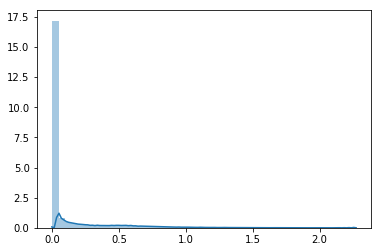

In [33]:
import seaborn as sns
%matplotlib inline
sns.distplot(check_data.ravel())

(262144,)